In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sequana.ribodesigner import RiboDesigner
import pysam
import pandas as pd

In [3]:
assembly = "../test/data/ribodesigner/sample.fasta"
seq_type = "rRNA"
gff = "../test/data/ribodesigner/sample.gff"
outdir = "out_ribodesigner"

In [4]:
assembly = "/pasteur/appa/homes/ekornobi/Biomics/resources/genomes/escherichia_coli-55989/escherichia_coli-55989.fa"
seq_type = "rRNA"
gff = "/pasteur/appa/homes/ekornobi/Biomics/resources/genomes/escherichia_coli-55989/escherichia_coli-55989.gff"
outdir = "out_ribodesigner_ecoli"

INFO    [sequana.gff3:184]:  Processing GFF file. 1. Reading the input file. Please be patient
INFO    [sequana.gff3:285]:  # kept 22 entries
INFO    [sequana.gff3:288]:  # rRNA: 22 entries
INFO    [sequana.gff3:184]:  Processing GFF file. 1. Reading the input file. Please be patient
INFO    [sequana.gff3:512]:  22 regions were extracted from '/pasteur/appa/homes/ekornobi/Biomics/resources/genomes/escherichia_coli-55989/escherichia_coli-55989.fa' to 'out_ribodesigner_ecoli/ribosome_sequences.fas'
INFO    [sequana:98]:  Found 22 'rRNA' entries in annotation file.
INFO    [sequana:99]:  Genetic types found in gff: region,gene,CDS,sequence_feature,pseudogene,riboswitch,rRNA,exon,tRNA,SRP_RNA,ncRNA,antisense_RNA,tmRNA,direct_repeat,RNase_P_RNA
INFO    [sequana:100]:  List of 'rRNA' detected: rna-EC55989_RS01020,rna-EC55989_RS01035,rna-EC55989_RS01040,rna-EC55989_RS14820,rna-EC55989_RS14825,rna-EC55989_RS14835,rna-EC55989_RS18895,rna-EC55989_RS18905,rna-EC55989_RS18910,rna-EC55989_RS18925,r

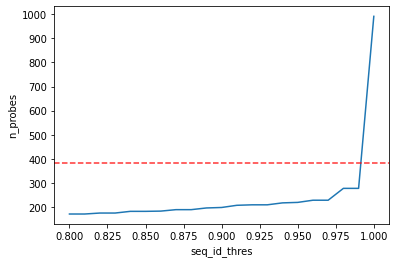

In [20]:
rd = RiboDesigner(assembly, gff, outdir, seq_type=seq_type, force=True)
rd.run()

In [19]:
rd.probes_df.reset_index()

,chr,start,stop,strand,probe_len,inter_len,sequence,seq_id,kept_after_clustering,bed_color,clustering_thres
0,NC_011748.1:224266-225807,0,47,+,47,18,AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGC,NC_011748.1:224266-225807:probe_0_47_forward,True,"128,255,170",0.99
1,NC_011748.1:224266-225807,32,79,-,47,18,GGTTACCTTGTTACGACTTCACCCCAGTCATGAATCACAAAGTGGTA,NC_011748.1:224266-225807:probe_32_79_reverse,True,"128,255,170",0.99
2,NC_011748.1:224266-225807,65,112,+,47,18,ACGGTAACAGGAAGCAGCTTGCTGCTTCGCTGACGAGTGGCGGACGG,NC_011748.1:224266-225807:probe_65_112_forward,True,"128,255,170",0.99
3,NC_011748.1:224266-225807,97,144,-,47,18,AAGCTACCTACTTCTTTTGCAACCCACTCCCATGGTGTGACGGGCGG,NC_011748.1:224266-225807:probe_97_144_reverse,True,"128,255,170",0.99
4,NC_011748.1:224266-225807,130,177,+,47,18,ACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCG,NC_011748.1:224266-225807:probe_130_177_forward,True,"128,255,170",0.99
...,...,...,...,...,...,...,...,...,...,...,...
985,NC_011748.1:4599881-4602784,2890,2938,-,48,20,TTAGTCGCTTAACC,NC_011748.1:4599881-4602784:probe_2890_2938_re...,False,"255,170,128",0.99
986,NC_011748.1:4602879-4602994,0,50,+,50,16,CCTGGCGGCCGTAGCGCGGTGGTCCCACCTGACCCCATGCCGAACT...,NC_011748.1:4602879-4602994:probe_0_50_forward,False,"255,170,128",0.99
987,NC_011748.1:4602879-4602994,33,83,-,50,16,CCCACACTACCATCGGCGCTACGGCGTTTCACTTCTGAGTTCGGCA...,NC_011748.1:4602879-4602994:probe_33_83_reverse,False,"255,170,128",0.99
988,NC_011748.1:4602879-4602994,66,116,+,50,16,GCCGATGGTAGTGTGGGGTCTCCCCATGCGAGAGTAGGGAACTGCC...,NC_011748.1:4602879-4602994:probe_66_116_forward,False,"255,170,128",0.99


In [16]:
rd.probes_df.kept_after_clustering.value_counts()

False    668
True     278
Name: kept_after_clustering, dtype: int64

In [9]:
rd.probes_df.seq_id.isin(rd.kept_probes)

NC_011748.1:224266-225807    0     47    +     True
                             32    79    -     True
                             65    112   +     True
                             97    144   -     True
                             130   177   +     True
                                              ...  
NC_011748.1:4599881-4602784  2754  2802  -    False
                             2788  2836  +    False
                             2822  2870  -    False
NC_011748.1:4602879-4602994  0     50    +    False
                             33    83    -    False
Name: seq_id, Length: 946, dtype: bool

## Download all bacterial genomes

In [11]:
# -r: recursive, -nd: do not keep the original hierarchy
! wget -r -nd ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/ .
! wget -r -nd ftp://ftp.ensemblgenomes.org/pub/current/bacteria/gff3 .


--2022-02-11 00:47:17--  ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/
           => ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’
Resolving ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)... 193.62.197.75
Connecting to ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)|193.62.197.75|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/current/bacteria/fasta ... done.
==> PASV ... done.    ==> LIST ... done.

ftp.ensemblgenomes.     [ <=>                ]  10.21K  --.-KB/s    in 0.1s    

2022-02-11 00:47:18 (101 KB/s) - ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’ saved [10458]

Removed ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’.
--2022-02-11 00:47:18--  ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/bacteria_0_collection/
           => ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/bacteria_0_collection/.listing’
==> CWD (1) /pub/cur

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/IPython/utils/_process_posix.py", line 162, in system
    res_idx = child.expect_list(patterns, self.read_timeout)
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/spawnbase.py", line 372, in expect_list
    return exp.expect_loop(timeout)
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/expect.py", line 161, in expect_loop
    idx = self.existing_data()
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/expect.py", line 47, in existing_data
    before_len = spawn._before.tell()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.u

TypeError: object of type 'NoneType' has no len()